# Random Forests
Decision trees are highly sensitive to training data and can easily overfit. Random forests reduce this sensitivity by creating multiple decision trees trained on different bootstrapped samples (random sampling with replacement). For each tree, only a random subset of features is considered during training to reduce correlation between trees. Although some trees may perform poorly, their errors are averaged out during prediction through a process called aggregation. These features make random forests more stable and generalizable than a single decision tree.

[image]

We will continue using the cardiovascular disease dataset from the decision tree notebook to demonstrate the improvements made by random forest. The ideal number of features for each tree is values close to the square root of the total number of features. This dataset has 11 input features, so the ideal number of trees is around 3.


Accuracy: 0.7338

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7030
           1       0.76      0.68      0.72      6970

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



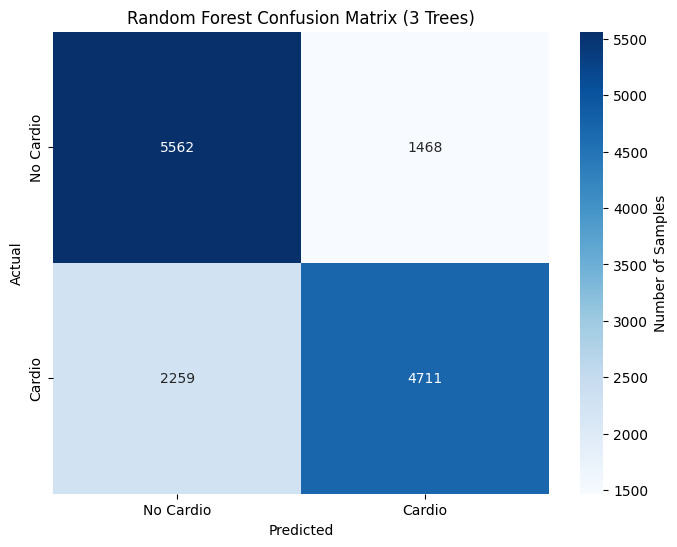

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example dataset (replace health_data with your real dataset if needed)
health_data = pd.read_csv("health_data.csv")

# Prepare features and target
X = health_data.drop(columns=["cardio"])
y = health_data["cardio"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build and train Random Forest with 3 trees
rf_clf = RandomForestClassifier(
    n_estimators=3,         # Only 3 trees
    max_depth=5,            # Limit depth for visibility
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Cardio", "Cardio"], 
            yticklabels=["No Cardio", "Cardio"],
            cbar_kws={'label': 'Number of Samples'})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix (3 Trees)')
plt.show()



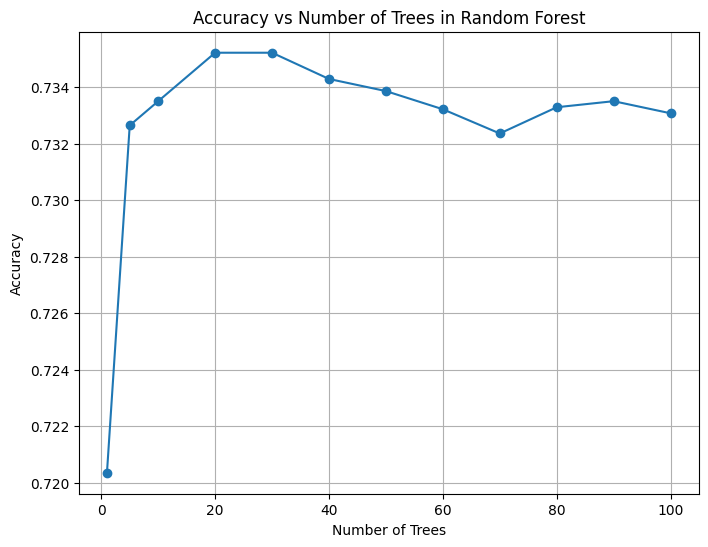

In [12]:
# List of tree counts to try
tree_counts = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
accuracies = []

# Train a Random Forest for each number of trees
for n_trees in tree_counts:
    rf = RandomForestClassifier(n_estimators=n_trees, max_depth=5, random_state=42, bootstrap=False)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the results
plt.figure(figsize=(8,6))
plt.plot(tree_counts, accuracies, marker='o')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [15]:
# Store all accuracies
accuracies = []

# Train and test 10 different trees
for i in range(10):
    # Different random split every time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a single Decision Tree
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Run {i+1}: Accuracy = {acc:.4f}")

# Average accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print(f"\nAverage Accuracy over 10 runs: {average_accuracy:.4f}")

Run 1: Accuracy = 0.7240
Run 2: Accuracy = 0.7256
Run 3: Accuracy = 0.7268
Run 4: Accuracy = 0.7269
Run 5: Accuracy = 0.7280
Run 6: Accuracy = 0.7279
Run 7: Accuracy = 0.7269
Run 8: Accuracy = 0.7253
Run 9: Accuracy = 0.7259
Run 10: Accuracy = 0.7250

Average Accuracy over 10 runs: 0.7262


On average, random forests performs better than decision trees.